In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../')
%run setup.py install
os.chdir(owd)

In [2]:
import numpy as np
import pyross
import pandas as pd
import matplotlib.pyplot as plt
MM = np.array((0,0,.2,.2,.2,.2,.2,.2,.4,.4,1.3,1.3,3.6,3.6,8,8))  ## mortality per 100

In [3]:
## population and age classes

M=16  # number of age classes

my_data = np.genfromtxt('../../data/age_structures/India-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

Ni=aM+aF
Ni=Ni[0:M]    # reducing it in lakhs
N=np.sum(Ni)
N
Tevov = 250

In [4]:
# contact matrices
my_data = pd.read_excel('../../data/contact_matrices_152_countries/MUestimates_home_1.xlsx', sheet_name='India',index_col=None)
CH = np.array(my_data)

my_data = pd.read_excel('../../data/contact_matrices_152_countries/MUestimates_work_1.xlsx', sheet_name='India',index_col=None)
CW = np.array(my_data)

my_data = pd.read_excel('../../data/contact_matrices_152_countries/MUestimates_school_1.xlsx', sheet_name='India',index_col=None)
CS = np.array(my_data)

my_data = pd.read_excel('../../data/contact_matrices_152_countries/MUestimates_other_locations_1.xlsx', sheet_name='India',index_col=None)
CO = np.array(my_data)

my_data = pd.read_excel('../../data/contact_matrices_152_countries/MUestimates_all_locations_1.xlsx', sheet_name='India',index_col=None)
CA = np.array(my_data)

### One closures

(0, 98)

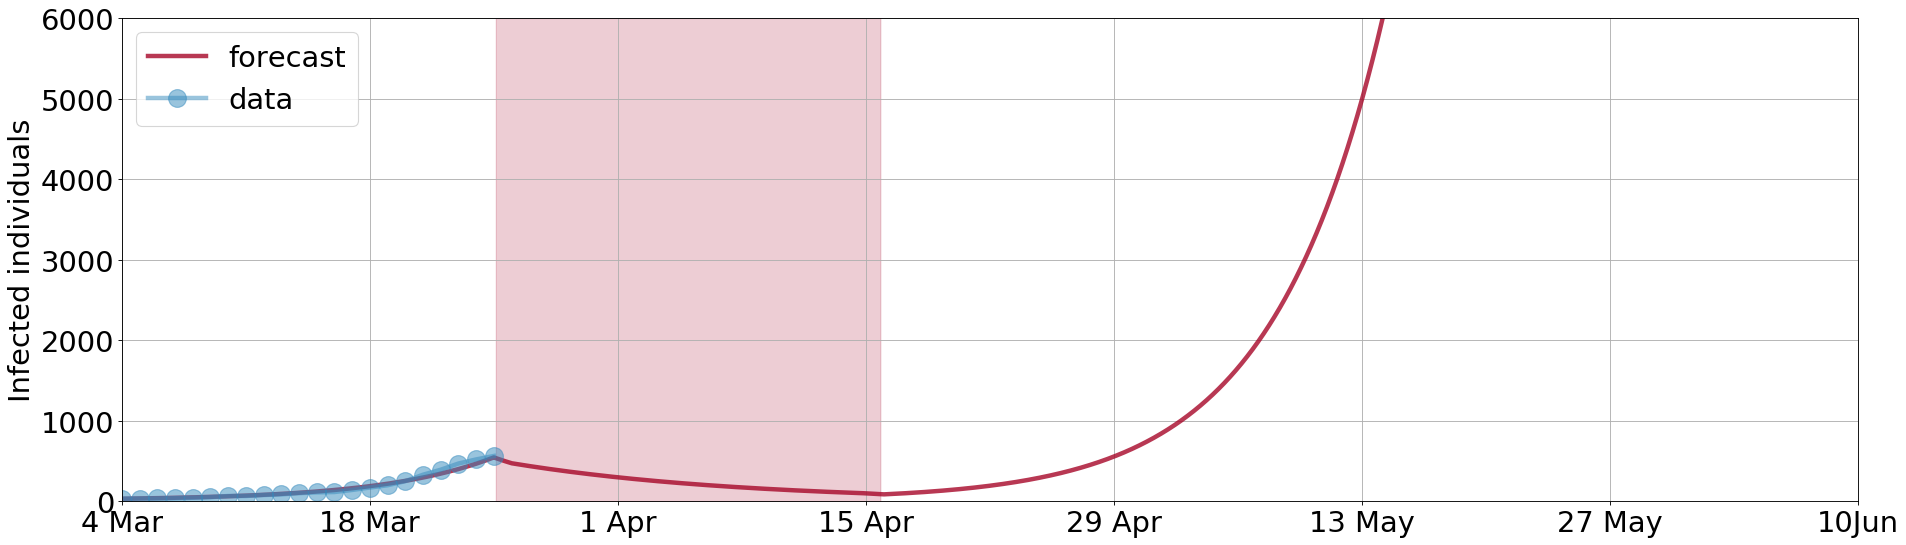

In [5]:
# epidemic parameters
alpha = 0.              # symptomatic fraction
beta  = 0.0155          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics

nD=4
Tf=98; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<i<42:
        CTS[i, :] = (CH).reshape(M*M)
    elif 42<i<98:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  

# start simulation
# initial conditions    
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))

S_0  = Ni - (Ia_0 + Is_0 + R_0)
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)

#Tf=19; filename='this.mat'
Nf=8000; filename='this.mat'

model.simulate(CTS, Nf, filename)

from scipy.io import loadmat
data=loadmat(filename)
IC  = np.zeros((Nf))
for i in range(M):
        IC += data['X'][:,2*M+i] 
t = data['t'][0]
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 26})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));
t1=int(Nf/14)
plt.fill_between(t[3*t1+10:6*t1+70], 0, 6000, color="#A60628", alpha=0.2)

my_data = np.genfromtxt('../../data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26, loc='upper left'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals')
plt.ylim(0, 6000)
plt.savefig('/Users/rsingh/Desktop/4a.png', format='png', dpi=200)
plt.xlim(0, 98)



In [6]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

2727.6431862140444

### Two closures

(0, 98)

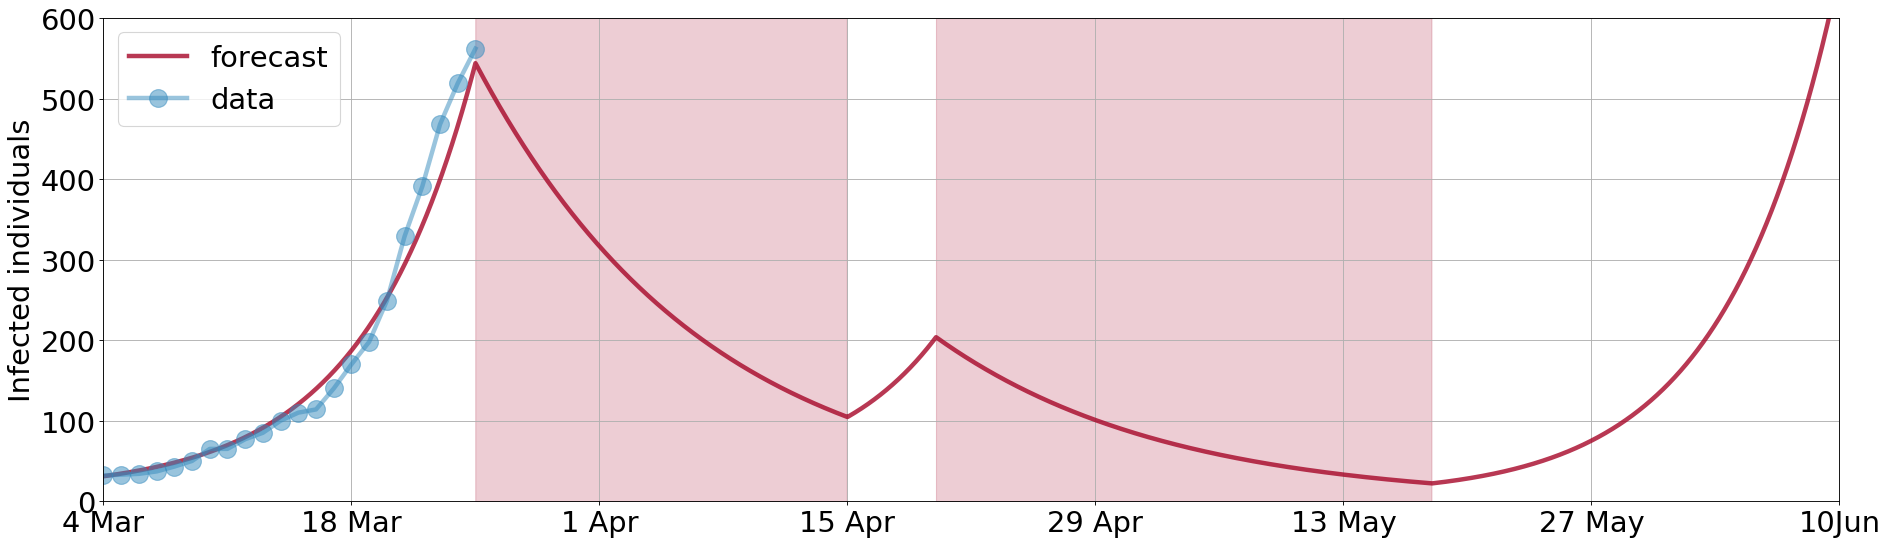

In [7]:
# epidemic parameters
alpha = 0.              # symptomatic fraction
beta  = 0.0155          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics

nD=4
Tf=98; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<=i<42:
        CTS[i, :] = (CH).reshape(M*M)
    elif 42<=i<47:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    elif 47<=i<75:
        CTS[i, :] = (CH).reshape(M*M)
    elif 75<=i:#<80:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    #elif 82<=i<96:
    #    CTS[i, :] = (CH).reshape(M*M)
  
#initial conditions    
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))

S_0  = Ni - (Ia_0 + Is_0 + R_0)
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)

#Tf=19; filename='this.mat'
Nf=8000; filename='this.mat'

model.simulate(CTS, Nf, filename)

from scipy.io import loadmat
data=loadmat(filename)

IC  = np.zeros((Nf))

for i in range(M):
        IC += data['X'][:,2*M+i] 
                
t = data['t'][0]
      
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 26})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));



t1=int(Nf/(14))
plt.fill_between(t[3*t1:6*t1], 0, 600, color="#A60628", alpha=0.2)
plt.fill_between(t[6*t1+410:10*t1+410], 0, 600, color="#A60628", alpha=0.2)

my_data = np.genfromtxt('../../data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals')
plt.ylim(0, 600)
plt.savefig('/Users/rsingh/Desktop/4b.png', format='png', dpi=200)
IC[-1]
plt.xlim(0, 98)



In [8]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

11.6463747273013

### Three closures

10.172905244889725

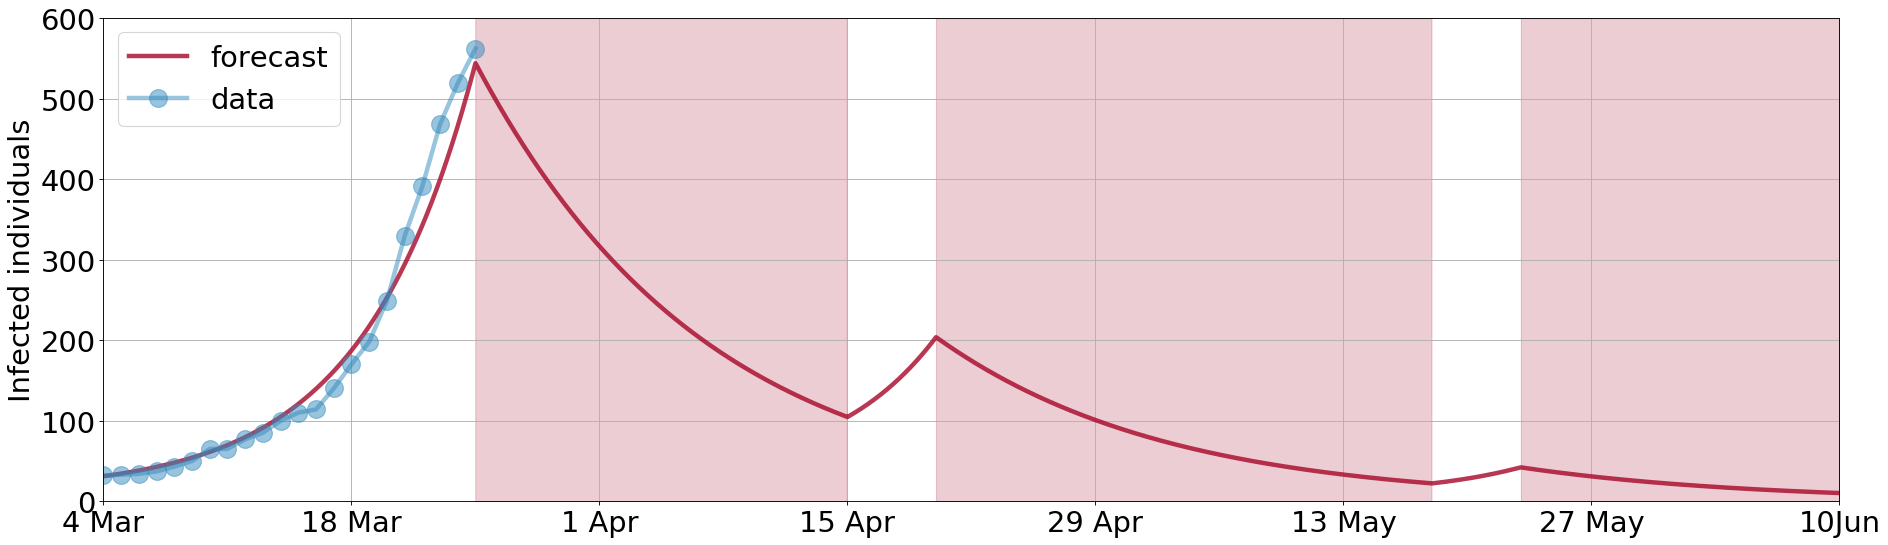

In [9]:
# epidemic parameters
alpha = 0.              # symptomatic fraction
beta  = 0.0155          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics

nD=4
Tf=98; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<=i<42:
        CTS[i, :] = (CH).reshape(M*M)
    elif 42<=i<47:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    elif 47<=i<75:
        CTS[i, :] = (CH).reshape(M*M)
    elif 75<=i<80:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)  
    elif 80<=i<98:
        CTS[i, :] = (CH).reshape(M*M)
  
#initial conditions    
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))

S_0  = Ni - (Ia_0 + Is_0 + R_0)
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)

#Tf=19; filename='this.mat'
Nf=8000; filename='this.mat'

model.simulate(CTS, Nf, filename)

from scipy.io import loadmat
data=loadmat(filename)

IC  = np.zeros((Nf))

for i in range(M):
        IC += data['X'][:,2*M+i] 
                
t = data['t'][0]
      
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 26})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));


t2=t1
t1=int(Nf/(14))
plt.fill_between(t[3*t1:6*t1], 0, 600, color="#A60628", alpha=0.2)
plt.fill_between(t[6*t1+410:10*t1+410], 0, 600, color="#A60628", alpha=0.2)
plt.fill_between(t[11*t1+250:14*t1+410], 0, 600, color="#A60628", alpha=0.2)


my_data = np.genfromtxt('../../data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26, loc='upper left'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals')
plt.ylim(0, 600)
plt.xlim(0, 98)


plt.savefig('/Users/rsingh/Desktop/4c.png', format='png', dpi=200)
IC[-1]

In [10]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

7.715907368287445

11.008492319102064

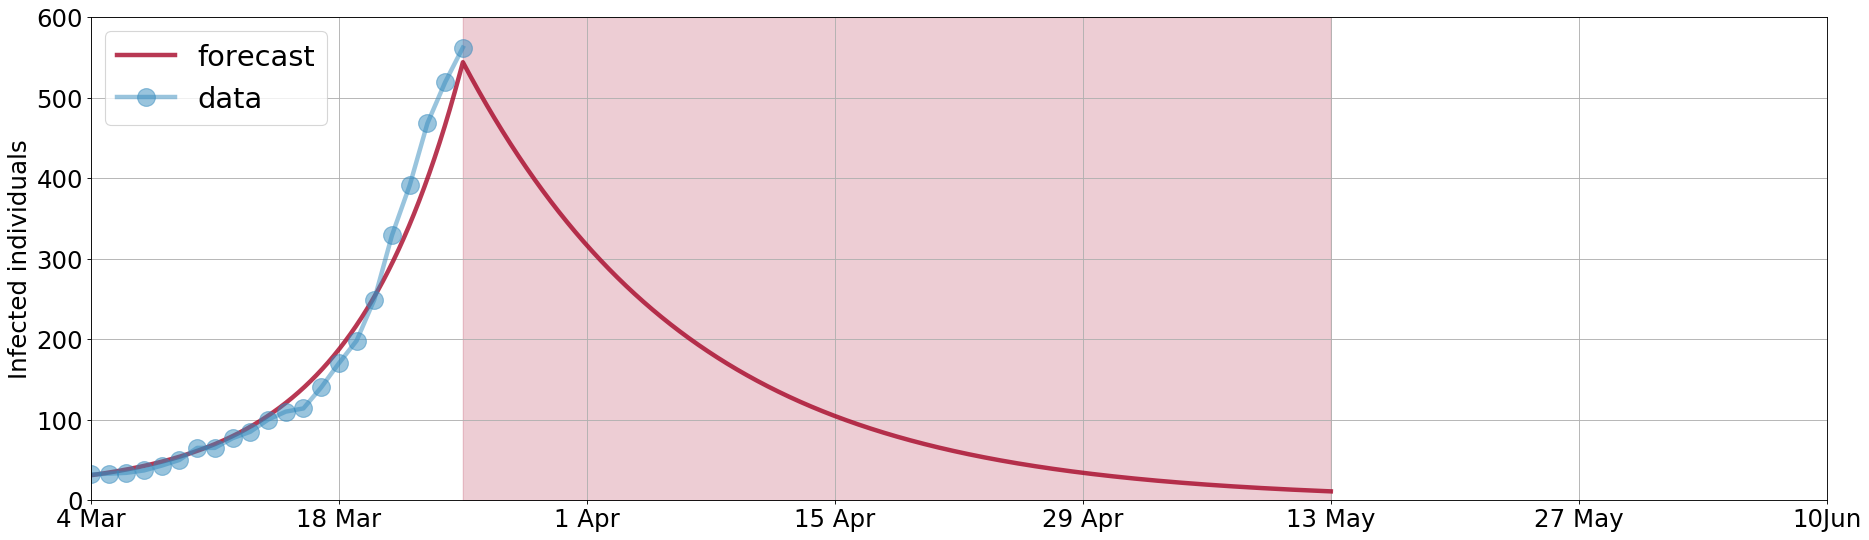

In [11]:
# epidemic parameters
alpha = 0.              # symptomatic fraction
beta  = 0.0155          # contact rate parameter
gamma = 1./7            # recovery rate 
fsa   = 1               # suppresion of contact by symptomatics

nD=4
Tf=70; 
CTS = np.zeros((2*Tf, M*M))

for i in range(2*Tf):
    if i<21:
        CTS[i, :] = (CH+CW+CS+CO).reshape(M*M)
    elif 21<=i<70:
        CTS[i, :] = (CH).reshape(M*M)
    if 70<=i<98:
        CTS[i, :] = 0#(CH+CW+CS+CO).reshape(M*M)



# start simulation
# initial conditions    
Is_0 = np.zeros((M));  Is_0[4:11]=4;  Is_0[1:4]=1
Ia_0 = np.zeros((M))
R_0  = np.zeros((M))

S_0  = Ni - (Ia_0 + Is_0 + R_0)
model = pyross.models.SIR(S_0, Ia_0, Is_0, alpha, beta, gamma, fsa, M, Ni, Tf)

#Tf=19; filename='this.mat'
Nf=8000; filename='this.mat'

model.simulate(CTS, Nf, filename)

from scipy.io import loadmat
data=loadmat(filename)
IC  = np.zeros((Nf))
for i in range(M):
        IC += data['X'][:,2*M+i] 
t = data['t'][0]
fig = plt.figure(num=None, figsize=(28, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, 200, 14),('4 Mar','18 Mar','1 Apr','15 Apr','29 Apr','13 May','27 May','10Jun'));


t1=int(Nf/(71/7))
plt.fill_between(t[3*t1+35:], 0, 600, color="#A60628", alpha=0.2)
#plt.fill_between(t[10*t1+10:14*t1+70], 0, 600, color="#A60628", alpha=0.2)

my_data = np.genfromtxt('../../data/covid-cases/india.txt', delimiter='', skip_header=6)
day, cases = my_data[:,0], my_data[:,2]

plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=16, label='data', alpha=0.5)
plt.legend(fontsize=26, loc='upper left'); plt.grid() 

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals')
plt.ylim(0, 600)
plt.xlim(0, 98)


plt.savefig('/Users/rsingh/Desktop/4d.png', format='png', dpi=200)
IC[-1]

In [12]:
m1 = .01*MM*(data['X'][0,0:M]-data['X'][-1,0:M])
np.sum(m1)

6.226041285939515

([<matplotlib.lines.Line2D at 0x1144d0c18>], None)

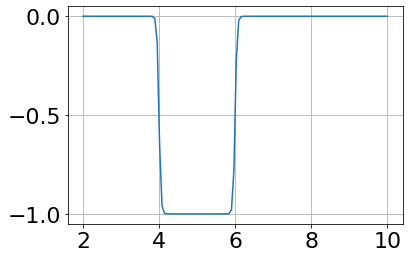

In [13]:
t = np.linspace(2, 10, 128)
t1 = 4; t2 = 6; tw = 0.05;
u1 = (t-t1)/tw; f1 = 1 - np.tanh(u1); f1 = 0.5*f1
u2 = (t-t2)/tw; f2 = 1 + np.tanh(u2); f2 = 0.5*f2

plt.plot(t, f1+f2-1), plt.grid('on')

In [14]:
def controlC(CH,uH, CW,uW,  CS,uS, CO,uO, t1, t2, tw, t):
    # uH = 0 implies no control for CH
    # uH = 1 implies windown control for CH etc. 
    
    # controls are turned on at t1 and off at t2
    # the control lag is tw
    
    # define a continuous "minus" function between t1 and t2
    # whose value is -1 in the window
    u1 = (t-t1)/tw; f1 = 1 - np.tanh(u1); f1 = 0.5*f1
    u2 = (t-t2)/tw; f2 = 1 + np.tanh(u2); f2 = 0.5*f2
    minus = f1+f2-1
    
    # the default contact matrix
    C = CH + CW + CS + CO 
    
    # the controlled contact matrix
    # terms with uK = 1 are "minused" out. 
    C = C  + uH*minus*CH + uW*minus*CW + uS*minus*CS + uO*minus*CO 
    
    return C

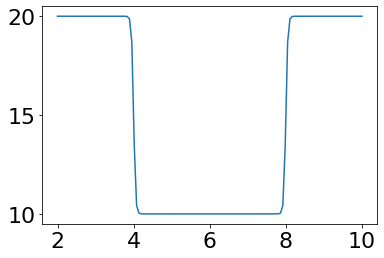

In [15]:
c = controlC(5,0,5,0,5,1,5,1, 4, 8, 0.05, t);plt.plot(t, c)

In [16]:
# the control protocol

t1 = 5;    # control on at t1
t2 = 10;   # control off at t2
tw = 0.05; # control lag

uH = 0  # no control on home
uW = 1  # control on work
uS = 0  # no control on school
uO = 0  # no control on others 

In [17]:
# set the time and evaluate controlled contact matrix
t = 19; 
C = controlC(CH,uH,CW,uW,CS,uS,CO,uO, t1,t2,tw,t)  
# matrix for linearised dynamics
L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))
for i in range(M):
    for j in range(M):
        L0[i,j]=C[i,j]*Ni[i]/Ni[j]
L[0:M, 0:M]     =    alpha*beta/gamma*L0
L[0:M, M:2*M]   = fsa*alpha*beta/gamma*L0
L[M:2*M, 0:M]   =    ((1-alpha)*beta/gamma)*L0
L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gamma)*L0
r0 = np.max(np.linalg.eigvals(L))
print("The basic reproductive ratio at t=0 is", r0)

The basic reproductive ratio at t=0 is (2.1055544598981144+0j)
